I have reran the codes for paper Fig. 4
Considering nrep=20
times= [150,170]
Date: Dec 18, 2024

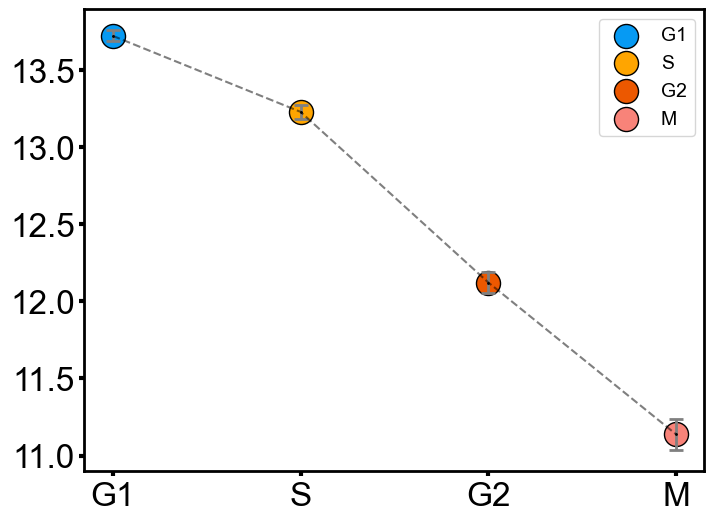

[13.72036256 13.22753337 12.12137358 11.13695279]
[0.16007044 0.20113121 0.31546983 0.45820399]
0.02562254549445896 0.040453765285151565 0.099521213842142 0.20995089418039545
T-test results between G1 and S:
T-statistic: 8.356998647326334, P-value: 5.732633524310845e-10

T-test results between S and G2:
T-statistic: 12.887523217053234, P-value: 2.87372731756144e-14

T-test results between G2 and Row M:
T-statistic: 7.71341722580226, P-value: 6.041911831202899e-09

20


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#mono rise neutral

# Path to the file
#active mono rise
#file_path = 'paper_NL_Data/active_mono_rise_all_mean.txt' #paper

#active valley
#file_path = 'paper_NL_Data/active_valley_all_mean.txt' #paper

#active peak
#file_path = 'paper_NL_Data/active_peak_all_mean.txt' #paper

#neutral peak
file_path = 'paper_NL_Data/neutral_peak_all_mean.txt' #paper

#neutral mono decay
#file_path = 'paper_NL_Data/neutral_mono_decay_all_mean.txt' #paper



# Load data from the text file
with open(file_path, 'r') as f:
    # Read the file content
    lines = f.readlines()

# Split each line by commas and convert each value to float
data = np.array([list(map(float, line.strip().split(','))) for line in lines])

# Print the resulting 2D NumPy array
#print(data)


# Calculate mean for each row
mean_values = np.mean(data, axis=1)

# Calculate standard deviation for each row
std_values = np.std(data, axis=1)

# Calculate standard error of the mean for each row (SEM)
sem_values = std_values / np.sqrt(data.shape[1])


points = mean_values
labels = ['G1', 'S', 'G2', 'M']

# Define colors for each point
colors = ['#069AF3', 'orange', '#EC5800', '#F88379']

# Set global font settings
plt.rcParams.update({
    'font.family': 'Arial',  # Use Arial font
    'font.size': 14,         # Set font size
})

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each point with error bars (standard deviation)
plt.errorbar(labels, points, yerr=sem_values, fmt='o', color='black', 
             ecolor='gray', elinewidth=2, capsize=5, capthick=2, 
             markersize=1, linestyle='None')  # 'None' ensures we don't plot the line between points

# Plot each point with different colors
for i, (point, color) in enumerate(zip(points, colors)):
    plt.scatter(labels[i], point, color=color, edgecolor='black', s=300, label=f'{labels[i]}')

# Connect the points with a dashed line (without standard deviation lines)
plt.plot(labels, points, linestyle='--', color='black', alpha=0.5)

# Show legend
plt.legend()

# Set axis labels
font_label = 20
# plt.xlabel('Labels', fontsize=font_label)
# plt.ylabel('Values', fontsize=font_label)
# plt.title('Points with Standard Deviation', fontsize=font_label)

# Set tick parameters
plt.tick_params(axis='both', which='major', width=3, labelsize=24)

# Access the Axes object
ax = plt.gca()

# Set the width of the x and y axes (spines)
axes_width_size = 2
ax.spines['bottom'].set_linewidth(axes_width_size)
ax.spines['left'].set_linewidth(axes_width_size)
ax.spines['top'].set_linewidth(axes_width_size)
ax.spines['right'].set_linewidth(axes_width_size)

# Show the plot
plt.show()


#print(data)
print(mean_values)
print(std_values)
print(np.var(data[0]),np.var(data[1]),np.var(data[2]),np.var(data[3]))
# Perform t-tests between the specified rows
t_stat_1_2, p_value_1_2 = stats.ttest_ind(data[0], data[1],equal_var=False)  # Row 1 vs Row 2
t_stat_2_3, p_value_2_3 = stats.ttest_ind(data[1], data[2],equal_var=False)  # Row 2 vs Row 3
t_stat_3_4, p_value_3_4 = stats.ttest_ind(data[2], data[3],equal_var=False)  # Row 3 vs Row 4

# Print the results
print("T-test results between G1 and S:")
print(f"T-statistic: {t_stat_1_2}, P-value: {p_value_1_2}\n")

print("T-test results between S and G2:")
print(f"T-statistic: {t_stat_2_3}, P-value: {p_value_2_3}\n")

print("T-test results between G2 and Row M:")
print(f"T-statistic: {t_stat_3_4}, P-value: {p_value_3_4}\n")

print(data.shape[1])